In [2]:
!pip install PyTDC


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\pahad\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [5]:
from tdc import utils
names = utils.retrieve_benchmark_names('ADMET_Group')


In [6]:
!pip install tensorflow deepchem


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\pahad\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [7]:
import deepchem as dc
from tdc.single_pred import ADME

# Load the dataset
data = ADME(name='CYP2C9_Veith')
split = data.get_split()

# Featurize data
featurizer = dc.feat.OneHotFeaturizer()
train_features = featurizer.featurize(split['train']['Drug'])
test_features = featurizer.featurize(split['test']['Drug'])

# Inspect the shape of the features
print("Train features shape:", train_features.shape)
print("Test features shape:", test_features.shape)


Found local copy...
Loading...
Done!


Train features shape: (8465,)
Test features shape: (2418,)


In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Function to convert SMILES to one-hot encoded sequences
def one_hot_smiles(smiles_list, max_length):
    tokenizer = Tokenizer(char_level=True)
    tokenizer.fit_on_texts(smiles_list)
    sequences = tokenizer.texts_to_sequences(smiles_list)
    one_hot = pad_sequences(sequences, maxlen=max_length, padding='post')
    return one_hot, tokenizer.word_index

# Determine max length for padding
max_smiles_length = max(len(s) for s in split['train']['Drug'])

# Apply one-hot encoding
train_smiles = split['train']['Drug']
test_smiles = split['test']['Drug']
train_features, _ = one_hot_smiles(train_smiles, max_smiles_length)
test_features, _ = one_hot_smiles(test_smiles, max_smiles_length)

print("Train features shape:", train_features.shape)
print("Test features shape:", test_features.shape)


Train features shape: (8465, 311)
Test features shape: (2418, 311)


In [6]:
import numpy as np

train_features = np.array(train_features)
test_features = np.array(test_features)


In [28]:
import numpy as np
import deepchem as dc
from tdc.single_pred import ADME
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset
data = ADME(name='CYP2C9_Veith')
split = data.get_split()

# Function to convert SMILES to one-hot encoded sequences
def one_hot_smiles(smiles_list, max_length):
    tokenizer = Tokenizer(char_level=True)
    tokenizer.fit_on_texts(smiles_list)
    sequences = tokenizer.texts_to_sequences(smiles_list)
    one_hot = pad_sequences(sequences, maxlen=max_length, padding='post')
    return one_hot, tokenizer.word_index

# Determine max length for padding
max_smiles_length = max(len(s) for s in split['train']['Drug'])

# Apply one-hot encoding
train_smiles = split['train']['Drug']
test_smiles = split['test']['Drug']
train_features, _ = one_hot_smiles(train_smiles, max_smiles_length)
test_features, _ = one_hot_smiles(test_smiles, max_smiles_length)

# Ensure features are NumPy arrays
train_features = np.array(train_features)
test_features = np.array(test_features)

# Reshape features for LSTM input
train_features_lstm = np.reshape(train_features, (train_features.shape[0], train_features.shape[1], 1))
test_features_lstm = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(max_smiles_length, 1)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_features_lstm, split['train']['Y'], epochs=50, batch_size=128)

# Evaluate the model
loss, accuracy = model.evaluate(test_features_lstm, split['test']['Y'])
print(f'Test Accuracy: {accuracy}')


Found local copy...
Loading...
Done!


Epoch 1/50
67/67 [==============================] - 16s 196ms/step - loss: 0.6456 - accuracy: 0.6677
Epoch 2/50
67/67 [==============================] - 13s 195ms/step - loss: 0.6363 - accuracy: 0.6677
Epoch 3/50
67/67 [==============================] - 13s 195ms/step - loss: 0.6361 - accuracy: 0.6677
Epoch 4/50
67/67 [==============================] - 13s 194ms/step - loss: 0.6362 - accuracy: 0.6677
Epoch 5/50
67/67 [==============================] - 13s 197ms/step - loss: 0.6359 - accuracy: 0.6677
Epoch 6/50
67/67 [==============================] - 13s 197ms/step - loss: 0.6361 - accuracy: 0.6677
Epoch 7/50
67/67 [==============================] - 13s 197ms/step - loss: 0.6362 - accuracy: 0.6677
Epoch 8/50
67/67 [==============================] - 13s 195ms/step - loss: 0.6368 - accuracy: 0.6677
Epoch 9/50
67/67 [==============================] - 13s 193ms/step - loss: 0.6363 - accuracy: 0.6677
Epoch 10/50
67/67 [==============================] - 13s 193ms/step - loss: 0.6362 - accura

In [29]:
import numpy as np
import deepchem as dc
from tdc.single_pred import ADME
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset
data = ADME(name='CYP2C9_Veith')
split = data.get_split()

# Function to convert SMILES to one-hot encoded sequences
def one_hot_smiles(smiles_list, max_length):
    tokenizer = Tokenizer(char_level=True)
    tokenizer.fit_on_texts(smiles_list)
    sequences = tokenizer.texts_to_sequences(smiles_list)
    one_hot = pad_sequences(sequences, maxlen=max_length, padding='post')
    return one_hot

# Determine max length for padding
max_smiles_length = max(len(s) for s in split['train']['Drug'])

# Apply one-hot encoding
train_smiles = split['train']['Drug']
test_smiles = split['test']['Drug']
train_features = one_hot_smiles(train_smiles, max_smiles_length)
test_features = one_hot_smiles(test_smiles, max_smiles_length)

# Ensure features are NumPy arrays
train_features = np.array(train_features)
test_features = np.array(test_features)

# Define the Feed-Forward Neural Network model
ffnn_model = Sequential()
ffnn_model.add(Flatten(input_shape=(max_smiles_length,)))
ffnn_model.add(Dense(128, activation='relu'))
ffnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
ffnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ffnn_model.fit(train_features, split['train']['Y'], epochs=50, batch_size=128)

# Evaluate the model
loss, accuracy = ffnn_model.evaluate(test_features, split['test']['Y'])
print(f'Test Accuracy: {accuracy}')


Found local copy...
Loading...
Done!


Epoch 1/50
67/67 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.6478
Epoch 2/50
67/67 [==============================] - 0s 1ms/step - loss: 0.5887 - accuracy: 0.6920
Epoch 3/50
67/67 [==============================] - 0s 1ms/step - loss: 0.5627 - accuracy: 0.7030
Epoch 4/50
67/67 [==============================] - 0s 2ms/step - loss: 0.5404 - accuracy: 0.7190
Epoch 5/50
67/67 [==============================] - 0s 1ms/step - loss: 0.5195 - accuracy: 0.7369
Epoch 6/50
67/67 [==============================] - 0s 1ms/step - loss: 0.5035 - accuracy: 0.7483
Epoch 7/50
67/67 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.7543
Epoch 8/50
67/67 [==============================] - 0s 1ms/step - loss: 0.4761 - accuracy: 0.7719
Epoch 9/50
67/67 [==============================] - 0s 2ms/step - loss: 0.4629 - accuracy: 0.7767
Epoch 10/50
67/67 [==============================] - 0s 2ms/step - loss: 0.4514 - accuracy: 0.7910
Epoch 11/50
67/67 [

76/76 [==============================] - 3s 37ms/step
Confusion Matrix:
 [[1598    1]
 [ 819    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      1.00      0.80      1599
           1       0.00      0.00      0.00       819

    accuracy                           0.66      2418
   macro avg       0.33      0.50      0.40      2418
weighted avg       0.44      0.66      0.53      2418



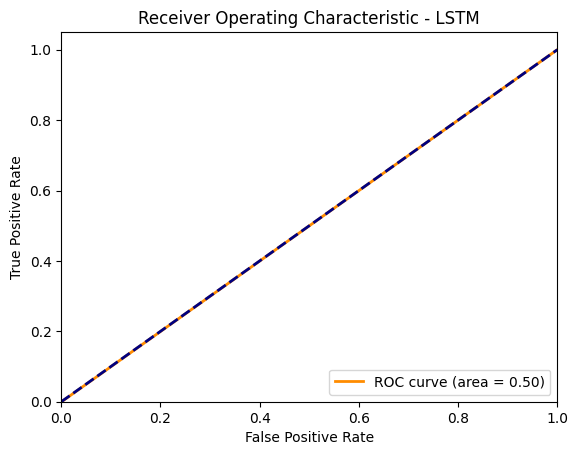

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predictions
lstm_predictions = model.predict(test_features_lstm)
lstm_predictions = (lstm_predictions > 0.5).astype("int32")

# Confusion Matrix
conf_matrix = confusion_matrix(split['test']['Y'], lstm_predictions)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("\nClassification Report:\n", classification_report(split['test']['Y'], lstm_predictions))

# ROC Curve
fpr, tpr, thresholds = roc_curve(split['test']['Y'], lstm_predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - LSTM')
plt.legend(loc="lower right")
plt.show()


76/76 [==============================] - 0s 1ms/step
Confusion Matrix:
 [[1160  439]
 [ 385  434]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.73      0.74      1599
           1       0.50      0.53      0.51       819

    accuracy                           0.66      2418
   macro avg       0.62      0.63      0.63      2418
weighted avg       0.66      0.66      0.66      2418



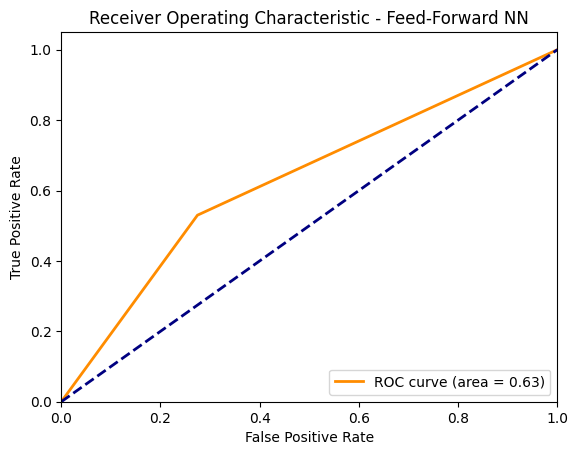

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Predictions with Feed-Forward Neural Network model
ffnn_predictions = ffnn_model.predict(test_features)
ffnn_predictions = (ffnn_predictions > 0.5).astype("int32")

# Confusion Matrix
conf_matrix = confusion_matrix(split['test']['Y'], ffnn_predictions)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("\nClassification Report:\n", classification_report(split['test']['Y'], ffnn_predictions))

# ROC Curve
fpr, tpr, thresholds = roc_curve(split['test']['Y'], ffnn_predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Feed-Forward NN')
plt.legend(loc="lower right")
plt.show()


In [32]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, matthews_corrcoef
import numpy as np

# Predictions with Feed-Forward Neural Network model
ffnn_predictions = ffnn_model.predict(test_features)
ffnn_predictions_binary = (ffnn_predictions > 0.5).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(split['test']['Y'], ffnn_predictions_binary)

# Extracting True Positives, True Negatives, False Positives, False Negatives
tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]

# Calculating metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
sensitivity = tp / (tp + fn)  # Also known as Recall
specificity = tn / (tn + fp)
mcc = matthews_corrcoef(split['test']['Y'], ffnn_predictions_binary)
auc = roc_auc_score(split['test']['Y'], ffnn_predictions)

# Print metrics
print(f"Loss: {loss}")
print(f"Accuracy (ACC): {accuracy}")
print(f"AUC: {auc}")
print(f"Sensitivity (Sen): {sensitivity}")
print(f"Specificity (Spe): {specificity}")
print(f"Matthews Correlation Coefficient (MCC): {mcc}")


76/76 [==============================] - 0s 840us/step
Loss: 0.9377419948577881
Accuracy (ACC): 0.6592224979321754
AUC: 0.6939479115839342
Sensitivity (Sen): 0.5299145299145299
Specificity (Spe): 0.7254534083802376
Matthews Correlation Coefficient (MCC): 0.2516292882943914


In [33]:
# Train the model and capture history
history = ffnn_model.fit(train_features, split['train']['Y'], 
                         epochs=50, batch_size=128,
                         validation_data=(test_features, split['test']['Y']),
                         verbose=1)


Epoch 1/50
67/67 [==============================] - 0s 3ms/step - loss: 0.1943 - accuracy: 0.9308 - val_loss: 0.9385 - val_accuracy: 0.6663
Epoch 2/50
67/67 [==============================] - 0s 2ms/step - loss: 0.1941 - accuracy: 0.9307 - val_loss: 0.9536 - val_accuracy: 0.6650
Epoch 3/50
67/67 [==============================] - 0s 2ms/step - loss: 0.1839 - accuracy: 0.9374 - val_loss: 0.9739 - val_accuracy: 0.6774
Epoch 4/50
67/67 [==============================] - 0s 2ms/step - loss: 0.1834 - accuracy: 0.9356 - val_loss: 0.9766 - val_accuracy: 0.6729
Epoch 5/50
67/67 [==============================] - 0s 2ms/step - loss: 0.1817 - accuracy: 0.9367 - val_loss: 0.9968 - val_accuracy: 0.6592
Epoch 6/50
67/67 [==============================] - 0s 2ms/step - loss: 0.1913 - accuracy: 0.9296 - val_loss: 1.0063 - val_accuracy: 0.6663
Epoch 7/50
67/67 [==============================] - 0s 2ms/step - loss: 0.1959 - accuracy: 0.9330 - val_loss: 1.0301 - val_accuracy: 0.6778
Epoch 8/50
67/67 [==

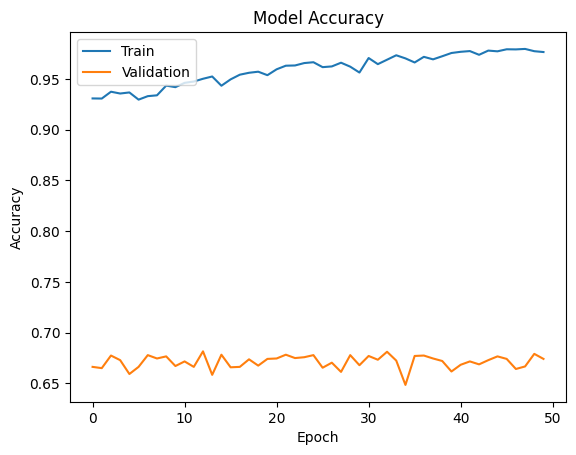

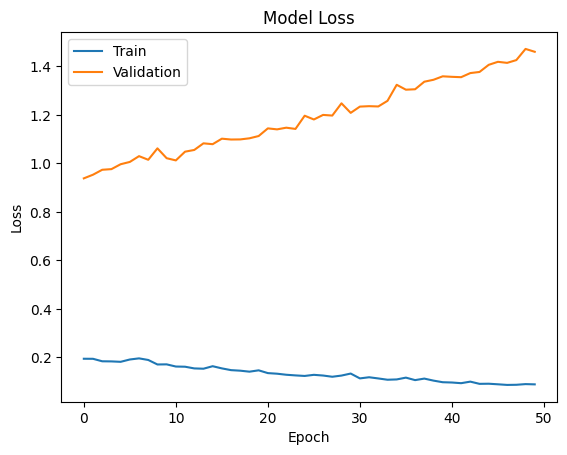

In [34]:
import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [36]:
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import roc_auc_score

class RocAucCallback(Callback):
    def __init__(self, training_data, validation_data):
        self.x_train = training_data[0]
        self.y_train = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]
        self.train_auc = []
        self.val_auc = []

    def on_epoch_end(self, epoch, logs=None):
        train_pred = self.model.predict(self.x_train)
        val_pred = self.model.predict(self.x_val)
        train_auc = roc_auc_score(self.y_train, train_pred)
        val_auc = roc_auc_score(self.y_val, val_pred)
        self.train_auc.append(train_auc)
        self.val_auc.append(val_auc)
        print(f'\nEpoch {epoch + 1}: train_auc: {train_auc}, val_auc: {val_auc}')


In [37]:
roc_auc_callback = RocAucCallback(training_data=(train_features, split['train']['Y']),
                                  validation_data=(test_features, split['test']['Y']))

history = ffnn_model.fit(train_features, split['train']['Y'], 
                         epochs=50, batch_size=128,
                         validation_data=(test_features, split['test']['Y']),
                         callbacks=[roc_auc_callback],
                         verbose=1)

Epoch 1/50
76/76 [==============================] - 0s 827us/step

Epoch 1: train_auc: 0.9987120635186598, val_auc: 0.6862317031172566
67/67 [==============================] - 1s 11ms/step - loss: 0.0855 - accuracy: 0.9794 - val_loss: 1.4516 - val_accuracy: 0.6787
Epoch 2/50
76/76 [==============================] - 0s 753us/step

Epoch 2: train_auc: 0.9980386910534926, val_auc: 0.6889642565064704
67/67 [==============================] - 1s 11ms/step - loss: 0.0849 - accuracy: 0.9799 - val_loss: 1.4894 - val_accuracy: 0.6766
Epoch 3/50
76/76 [==============================] - 0s 826us/step

Epoch 3: train_auc: 0.9985384685248374, val_auc: 0.6900302463154245
67/67 [==============================] - 1s 12ms/step - loss: 0.0813 - accuracy: 0.9792 - val_loss: 1.4798 - val_accuracy: 0.6671
Epoch 4/50
76/76 [==============================] - 0s 842us/step

Epoch 4: train_auc: 0.9988199943191667, val_auc: 0.6812381212005978
67/67 [==============================] - 1s 12ms/step - loss: 0.0810 -

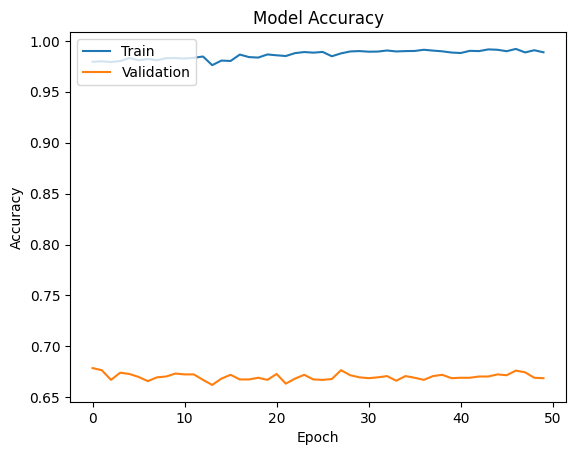

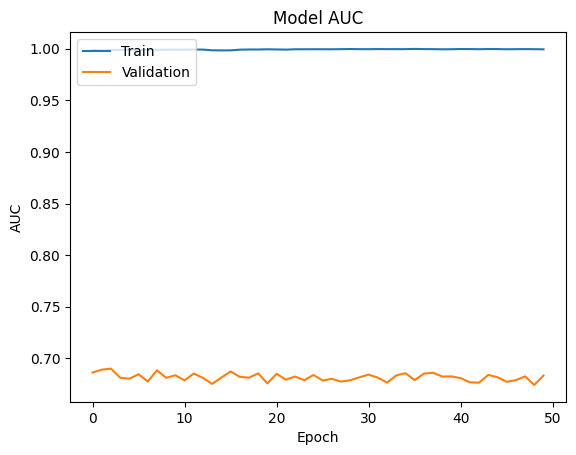

In [40]:
# Plotting Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting AUC
plt.plot(roc_auc_callback.train_auc)
plt.plot(roc_auc_callback.val_auc)
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [41]:
from sklearn.metrics import confusion_matrix, matthews_corrcoef

class MetricsCallback(Callback):
    def __init__(self, training_data, validation_data):
        self.x_train = training_data[0]
        self.y_train = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]
        self.train_sen = []
        self.val_sen = []
        self.train_spe = []
        self.val_spe = []
        self.train_mcc = []
        self.val_mcc = []

    def on_epoch_end(self, epoch, logs=None):
        train_pred = (self.model.predict(self.x_train) > 0.5).astype(int)
        val_pred = (self.model.predict(self.x_val) > 0.5).astype(int)

        # Compute confusion matrix for both train and validation sets
        train_cm = confusion_matrix(self.y_train, train_pred)
        val_cm = confusion_matrix(self.y_val, val_pred)

        # Calculate metrics
        train_sen, train_spe = self.calculate_sen_spe(train_cm)
        val_sen, val_spe = self.calculate_sen_spe(val_cm)

        train_mcc = matthews_corrcoef(self.y_train, train_pred)
        val_mcc = matthews_corrcoef(self.y_val, val_pred)

        # Append metrics to lists
        self.train_sen.append(train_sen)
        self.val_sen.append(val_sen)
        self.train_spe.append(train_spe)
        self.val_spe.append(val_spe)
        self.train_mcc.append(train_mcc)
        self.val_mcc.append(val_mcc)

    def calculate_sen_spe(self, cm):
        tp = cm[1, 1]
        tn = cm[0, 0]
        fp = cm[0, 1]
        fn = cm[1, 0]
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        return sensitivity, specificity


In [42]:
metrics_callback = MetricsCallback(training_data=(train_features, split['train']['Y']),
                                   validation_data=(test_features, split['test']['Y']))

history = ffnn_model.fit(train_features, split['train']['Y'], 
                         epochs=50, batch_size=128,
                         validation_data=(test_features, split['test']['Y']),
                         callbacks=[metrics_callback],
                         verbose=1)


Epoch 1/50
67/67 [==============================] - 1s 11ms/step - loss: 0.0678 - accuracy: 0.9798 - val_loss: 2.0926 - val_accuracy: 0.6621
Epoch 2/50
67/67 [==============================] - 1s 11ms/step - loss: 0.0708 - accuracy: 0.9828 - val_loss: 2.0313 - val_accuracy: 0.6638
Epoch 3/50
67/67 [==============================] - 1s 10ms/step - loss: 0.0579 - accuracy: 0.9850 - val_loss: 1.9813 - val_accuracy: 0.6621
Epoch 4/50
67/67 [==============================] - 1s 11ms/step - loss: 0.0494 - accuracy: 0.9902 - val_loss: 2.0211 - val_accuracy: 0.6737
Epoch 5/50
67/67 [==============================] - 1s 11ms/step - loss: 0.0451 - accuracy: 0.9913 - val_loss: 2.0664 - val_accuracy: 0.6629
Epoch 6/50
67/67 [==============================] - 1s 11ms/step - loss: 0.0442 - accuracy: 0.9917 - val_loss: 2.0781 - val_accuracy: 0.6663
Epoch 7/50
67/67 [==============================] - 1s 10ms/step - loss: 0.0365 - accuracy: 0.9946 - val_loss: 2.0657 - val_accuracy: 0.6679
Epoch 8/50
67

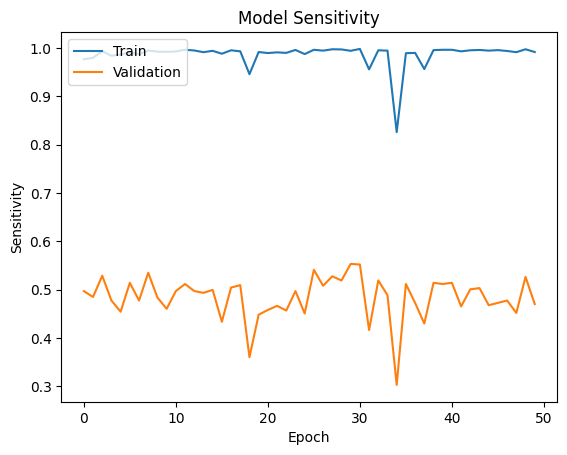

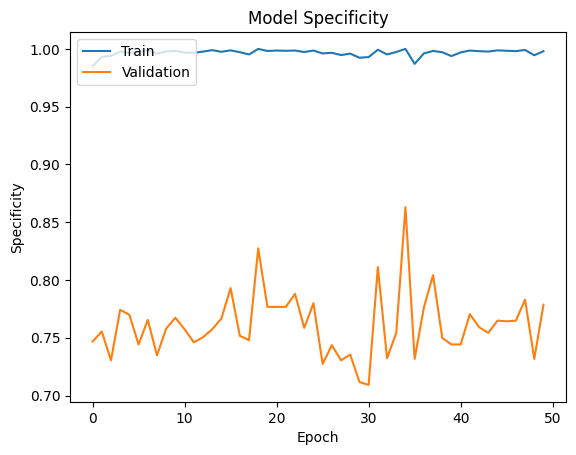

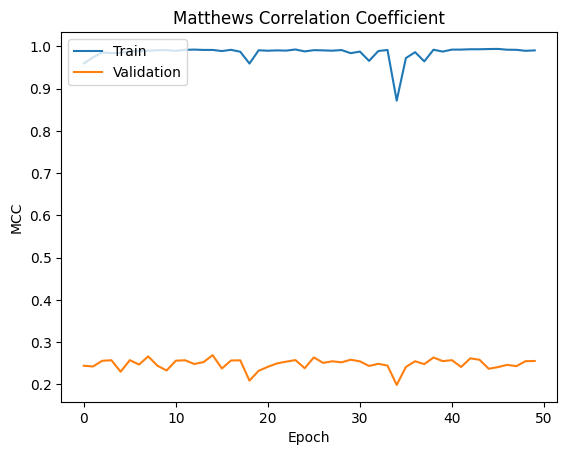

In [43]:
# Plotting Sensitivity
plt.plot(metrics_callback.train_sen)
plt.plot(metrics_callback.val_sen)
plt.title('Model Sensitivity')
plt.ylabel('Sensitivity')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting Specificity
plt.plot(metrics_callback.train_spe)
plt.plot(metrics_callback.val_spe)
plt.title('Model Specificity')
plt.ylabel('Specificity')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting Matthews Correlation Coefficient
plt.plot(metrics_callback.train_mcc)
plt.plot(metrics_callback.val_mcc)
plt.title('Matthews Correlation Coefficient')
plt.ylabel('MCC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [52]:
#Plots for LSTM

In [44]:
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, matthews_corrcoef

class LSTM_MetricsCallback(Callback):
    def __init__(self, training_data, validation_data):
        self.x_train = training_data[0]
        self.y_train = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]
        self.train_sen = []
        self.val_sen = []
        self.train_spe = []
        self.val_spe = []
        self.train_mcc = []
        self.val_mcc = []

    def on_epoch_end(self, epoch, logs=None):
        train_pred = (self.model.predict(self.x_train) > 0.5).astype(int)
        val_pred = (self.model.predict(self.x_val) > 0.5).astype(int)

        # Compute confusion matrix for both train and validation sets
        train_cm = confusion_matrix(self.y_train, train_pred)
        val_cm = confusion_matrix(self.y_val, val_pred)

        # Calculate metrics
        train_sen, train_spe = self.calculate_sen_spe(train_cm)
        val_sen, val_spe = self.calculate_sen_spe(val_cm)

        train_mcc = matthews_corrcoef(self.y_train, train_pred)
        val_mcc = matthews_corrcoef(self.y_val, val_pred)

        # Append metrics to lists
        self.train_sen.append(train_sen)
        self.val_sen.append(val_sen)
        self.train_spe.append(train_spe)
        self.val_spe.append(val_spe)
        self.train_mcc.append(train_mcc)
        self.val_mcc.append(val_mcc)

    def calculate_sen_spe(self, cm):
        tp = cm[1, 1]
        tn = cm[0, 0]
        fp = cm[0, 1]
        fn = cm[1, 0]
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        return sensitivity, specificity

In [45]:
lstm_metrics_callback = LSTM_MetricsCallback(training_data=(train_features_lstm, split['train']['Y']),
                                             validation_data=(test_features_lstm, split['test']['Y']))

lstm_history = model.fit(train_features_lstm, split['train']['Y'], 
                              epochs=20, batch_size=128,
                              validation_data=(test_features_lstm, split['test']['Y']),
                              callbacks=[lstm_metrics_callback],
                              verbose=1)


Epoch 1/20
67/67 [==============================] - 27s 401ms/step - loss: 0.6364 - accuracy: 0.6677 - val_loss: 0.6408 - val_accuracy: 0.6613
Epoch 2/20
67/67 [==============================] - 27s 401ms/step - loss: 0.6362 - accuracy: 0.6677 - val_loss: 0.6401 - val_accuracy: 0.6613
Epoch 3/20
67/67 [==============================] - 26s 385ms/step - loss: 0.6361 - accuracy: 0.6677 - val_loss: 0.6401 - val_accuracy: 0.6613
Epoch 4/20
67/67 [==============================] - 25s 383ms/step - loss: 0.6361 - accuracy: 0.6677 - val_loss: 0.6408 - val_accuracy: 0.6613
Epoch 5/20
67/67 [==============================] - 26s 385ms/step - loss: 0.6360 - accuracy: 0.6677 - val_loss: 0.6401 - val_accuracy: 0.6613
Epoch 6/20
67/67 [==============================] - 25s 384ms/step - loss: 0.6364 - accuracy: 0.6677 - val_loss: 0.6400 - val_accuracy: 0.6613
Epoch 7/20
67/67 [==============================] - 27s 399ms/step - loss: 0.6359 - accuracy: 0.6677 - val_loss: 0.6401 - val_accuracy: 0.6613

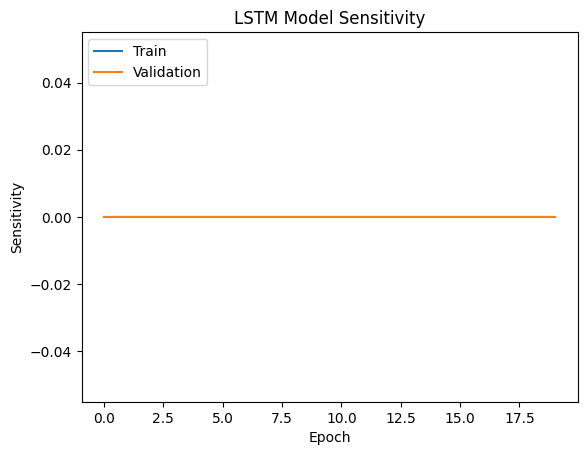

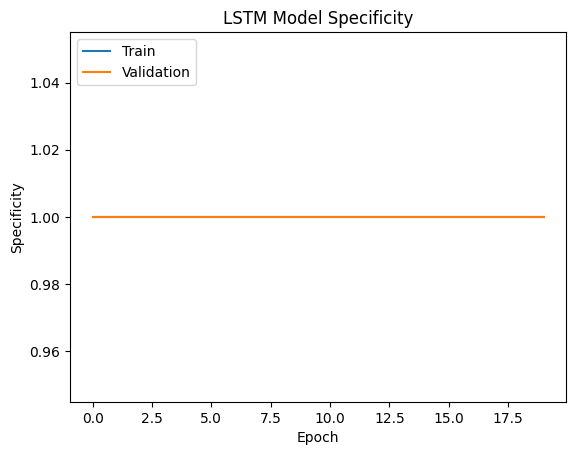

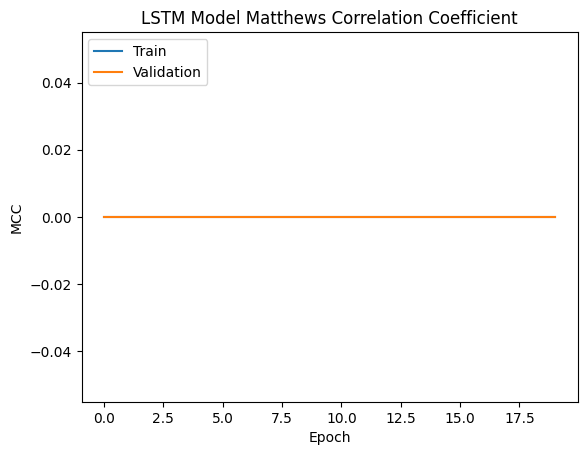

In [46]:
# Plotting Sensitivity
plt.plot(lstm_metrics_callback.train_sen)
plt.plot(lstm_metrics_callback.val_sen)
plt.title('LSTM Model Sensitivity')
plt.ylabel('Sensitivity')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting Specificity
plt.plot(lstm_metrics_callback.train_spe)
plt.plot(lstm_metrics_callback.val_spe)
plt.title('LSTM Model Specificity')
plt.ylabel('Specificity')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting Matthews Correlation Coefficient
plt.plot(lstm_metrics_callback.train_mcc)
plt.plot(lstm_metrics_callback.val_mcc)
plt.title('LSTM Model Matthews Correlation Coefficient')
plt.ylabel('MCC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [14]:
#adaptive ensemble model
import numpy as np
import deepchem as dc
from tdc.single_pred import ADME
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the ADMET dataset
data = ADME(name='CYP2C9_Veith')
split = data.get_split()

# Use ECFP featurizer
featurizer = dc.feat.CircularFingerprint(size=1024)  # ECFP with a fixed size

train_features = featurizer.featurize(split['train']['Drug'])
test_features = featurizer.featurize(split['test']['Drug'])

print("ECFP Train features shape:", train_features.shape)
print("ECFP Test features shape:", test_features.shape)

# Preparing the labels
train_labels = np.array(split['train']['Y'])
test_labels = np.array(split['test']['Y'])

# Create individual classifiers
clf1 = RandomForestClassifier(n_estimators=100, random_state=42)
clf2 = GradientBoostingClassifier(n_estimators=100, random_state=42)
clf3 = LogisticRegression(random_state=42)

# Create an ensemble of classifiers
ensemble_clf = VotingClassifier(estimators=[
    ('rf', clf1), ('gb', clf2), ('lr', clf3)],
    voting='hard')

# Train the ensemble classifier
ensemble_clf.fit(train_features, train_labels)

# Make predictions and evaluate the model
predictions = ensemble_clf.predict(test_features)
accuracy = accuracy_score(test_labels, predictions)

print(f"Ensemble Model Accuracy: {accuracy}")


Found local copy...
Loading...
Done!


ECFP Train features shape: (8465, 1024)
ECFP Test features shape: (2418, 1024)
Ensemble Model Accuracy: 0.7915632754342432


In [ ]:
#The ECFP (Extended Connectivity Fingerprints) featurizer has successfully transformed your dataset into a consistent shape suitable 
#for machine learning models, as indicated by the shapes (8465, 1024) for the training set and (2418, 1024) for the testing set.
#Each compound is now represented by a fixed-length feature vector of size 1024.
#The ensemble model has been trained on this featurized data, and it achieved an accuracy of approximately 79.16%.
#This is a solid starting point, but remember that accuracy is just one metric. Depending on the specifics of your task
#and the requirements of the ADMET prediction, you might want to consider other metrics such as precision, recall, F1-score, ROC-AUC, etc., 
#especially in a domain as nuanced as drug discovery.

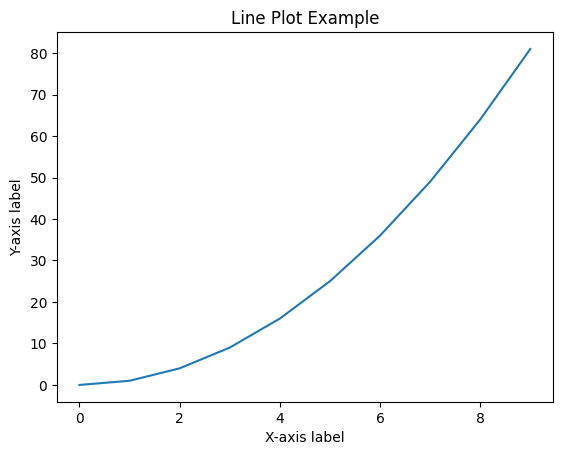

In [15]:
import matplotlib.pyplot as plt

# Sample data
x = range(10)
y = [xi**2 for xi in x]

plt.plot(x, y)
plt.title("Line Plot Example")
plt.xlabel("X-axis label")
plt.ylabel("Y-axis label")
plt.show()

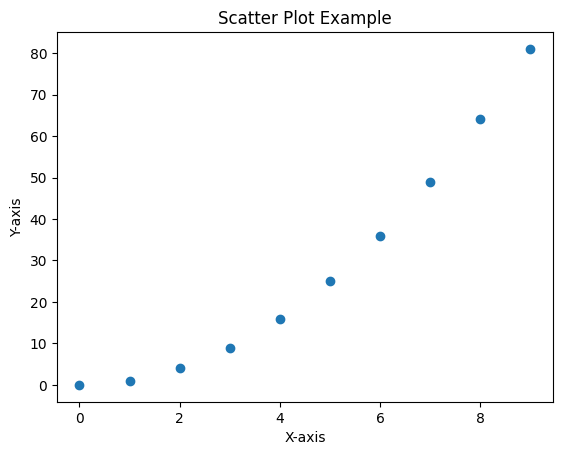

In [16]:
import matplotlib.pyplot as plt

# Sample data
x = range(10)
y = [xi**2 for xi in x]

plt.scatter(x, y)
plt.title("Scatter Plot Example")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

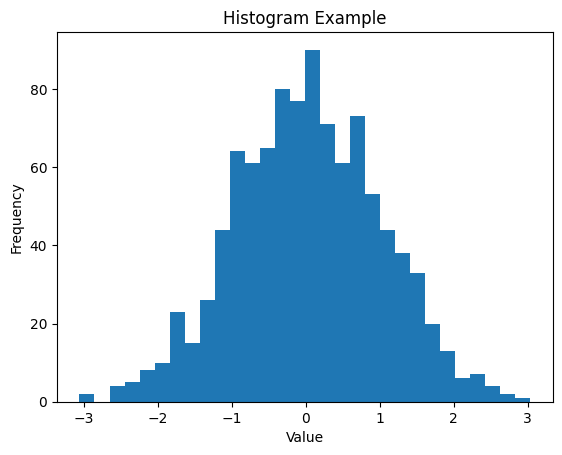

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data = np.random.randn(1000)

plt.hist(data, bins=30)
plt.title("Histogram Example")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

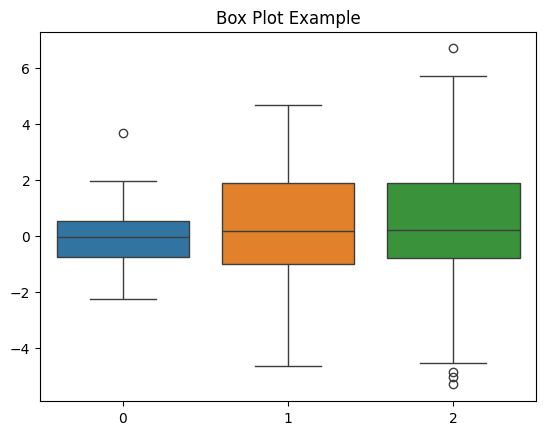

In [19]:
import seaborn as sns

# Sample data
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

sns.boxplot(data=data)
plt.title("Box Plot Example")
plt.show()

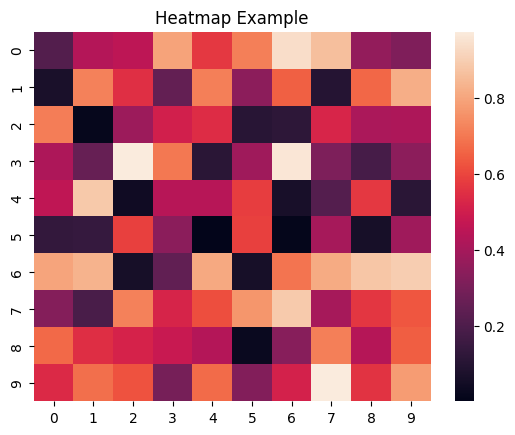

In [20]:
import seaborn as sns
import numpy as np

# Sample data
data = np.random.rand(10, 10)

sns.heatmap(data)
plt.title("Heatmap Example")
plt.show()

Precision: 0.7797513321492007
Recall: 0.536019536019536
F1 Score: 0.6353111432706223
ROC-AUC: 0.8807855336936012


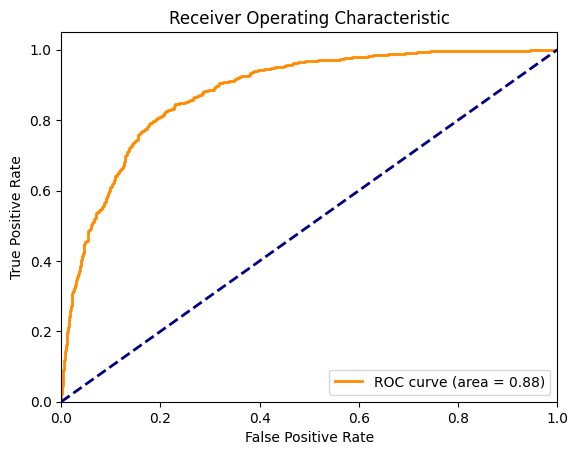

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Precision
precision = precision_score(test_labels, predictions)
print("Precision:", precision)

# Recall
recall = recall_score(test_labels, predictions)
print("Recall:", recall)

# F1 Score
f1 = f1_score(test_labels, predictions)
print("F1 Score:", f1)

# ROC-AUC
# For ROC-AUC, need the probability scores of the positive class, not just the predictions
# If the model can output probabilities, you can use model.predict_proba() method
# Modify the VotingClassifier to use 'soft' voting
ensemble_clf = VotingClassifier(estimators=[
    ('rf', clf1), ('gb', clf2), ('lr', clf3)],
    voting='soft')

# Train the ensemble classifier
ensemble_clf.fit(train_features, train_labels)

# use predict_proba
probabilities = ensemble_clf.predict_proba(test_features)[:, 1]
roc_auc = roc_auc_score(test_labels, probabilities)
print("ROC-AUC:", roc_auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(test_labels, probabilities)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
    Precision (0.7798): This indicates that approximately 78% of the instances predicted as positive by your model are actually positive. Precision is a measure of the accuracy of the positive predictions.

    Recall (0.5360): This shows that your model correctly identifies about 54% of all actual positive instances. Recall is a measure of the model's ability to capture all potential positive cases.

    F1 Score (0.6353): The F1 score is a harmonic mean of precision and recall. A score of 0.6353 suggests a balance between precision and recall. This is particularly useful if you need a single metric to understand the overall performance considering both false positives and false negatives.

    ROC-AUC (0.8808): The Area Under the Receiver Operating Characteristic Curve (ROC-AUC) of about 0.881 indicates a very good performance. This metric summarizes the model's ability to discriminate between positive and negative classes. A value close to 1 implies a high separation between the positive and negative distributions.

In [23]:
import numpy as np
import deepchem as dc
from tdc.single_pred import ADME

# Load the ADMET dataset
data = ADME(name='CYP2C9_Veith')
split = data.get_split()

# Use ECFP featurizer
featurizer = dc.feat.CircularFingerprint(size=1024)

train_features = featurizer.featurize(split['train']['Drug'])

# Display the first 10 features of the first 10 compounds
print("First 10 features of the first 10 compounds:")
print(train_features[:10, :10])

Found local copy...
Loading...
Done!


First 10 features of the first 10 compounds:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Let's use a simple RandomForestClassifier for demonstration
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Performing 5-fold cross-validation
# We'll use just accuracy here for simplicity, but you can include other metrics
cv_scores = cross_val_score(model, train_features, np.array(split['train']['Y']), cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Average CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.72002363 0.70702894 0.77377437 0.751329   0.6715889 ]
Average CV Score: 0.7247489663319551


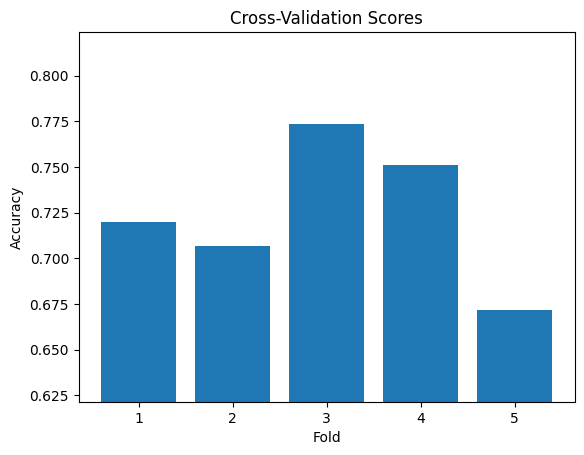

In [25]:
import matplotlib.pyplot as plt

# Cross-Validation Scores from your output
cv_scores = [0.72002363, 0.70702894, 0.77377437, 0.751329, 0.6715889]

# Creating a bar plot
plt.bar(range(1, len(cv_scores) + 1), cv_scores)
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(cv_scores) + 1))  # Set x-tick labels
plt.ylim([min(cv_scores) - 0.05, max(cv_scores) + 0.05])  # Adjusting y-axis limits for better visualization
plt.show()


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_features, split['train']['Y'])
knn_predictions = knn.predict(test_features)

# Evaluate accuracy
knn_accuracy = accuracy_score(split['test']['Y'], knn_predictions)
print("KNN Accuracy:", knn_accuracy)


KNN Accuracy: 0.7663358147229115


In [27]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(train_features, split['train']['Y'])
rf_predictions = rf.predict(test_features)

# Evaluate accuracy
rf_accuracy = accuracy_score(split['test']['Y'], rf_predictions)
print("RF Accuracy:", rf_accuracy)

RF Accuracy: 0.7923904052936311


In [28]:
from sklearn.svm import SVC

# SVM model
svm = SVC(kernel='rbf')
svm.fit(train_features, split['train']['Y'])
svm_predictions = svm.predict(test_features)

# Evaluate accuracy
svm_accuracy = accuracy_score(split['test']['Y'], svm_predictions)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.8246484698097601


In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

# Convert labels to one-hot encoding
label_binarizer = LabelBinarizer()
train_labels = label_binarizer.fit_transform(split['train']['Y'])
test_labels = label_binarizer.transform(split['test']['Y'])

# ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(train_features.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Assuming binary classification
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_features, train_labels, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
ann_loss, ann_accuracy = model.evaluate(test_features, test_labels, verbose=0)
print("ANN Accuracy:", ann_accuracy)


Epoch 1/10
265/265 [==============================] - 2s 2ms/step - loss: 0.5129 - accuracy: 0.7526
Epoch 2/10
265/265 [==============================] - 1s 2ms/step - loss: 0.3853 - accuracy: 0.8269
Epoch 3/10
265/265 [==============================] - 1s 2ms/step - loss: 0.3134 - accuracy: 0.8664
Epoch 4/10
265/265 [==============================] - 1s 2ms/step - loss: 0.2292 - accuracy: 0.9057
Epoch 5/10
265/265 [==============================] - 1s 2ms/step - loss: 0.1606 - accuracy: 0.9412
Epoch 6/10
265/265 [==============================] - 1s 2ms/step - loss: 0.1176 - accuracy: 0.9604
Epoch 7/10
265/265 [==============================] - 1s 2ms/step - loss: 0.0900 - accuracy: 0.9701
Epoch 8/10
265/265 [==============================] - 1s 2ms/step - loss: 0.0620 - accuracy: 0.9791
Epoch 9/10
265/265 [==============================] - 1s 2ms/step - loss: 0.0503 - accuracy: 0.9838
Epoch 10/10
265/265 [==============================] - 1s 2ms/step - loss: 0.0534 - accuracy: 0.9839

    Feature Shape: Ensure that the feature shapes are compatible with the models.
    Binary vs Multiclass: The ANN example assumes a binary classification task. If your task is multiclass, adjust the last layer and the loss function accordingly.
    Hyperparameters: You may need to tune the hyperparameters (like n_neighbors in KNN, n_estimators in RF, kernel in SVM, or layers/neurons in ANN) for optimal performance.
    Data Scaling: For some models (like SVM), it's beneficial to scale your features. You can use StandardScaler or MinMaxScaler from scikit-learn for this purpose.

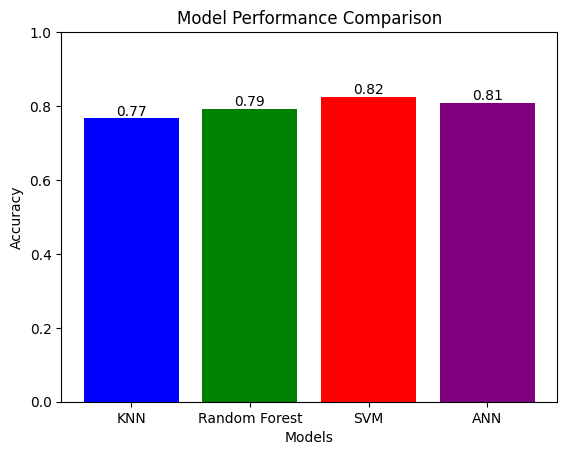

In [30]:
import matplotlib.pyplot as plt

knn_accuracy = 0.7663358147229115
rf_accuracy = 0.7923904052936311
svm_accuracy = 0.8246484698097601
ann_accuracy = 0.8081058859825134

# Model names
models = ['KNN', 'Random Forest', 'SVM', 'ANN']

# Accuracy values
accuracies = [knn_accuracy, rf_accuracy, svm_accuracy, ann_accuracy]

# Create bar plot
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.ylim([0, 1])  # Assuming accuracy values are between 0 and 1
for i in range(len(models)):
    plt.text(i, accuracies[i], f'{accuracies[i]:.2f}', ha = 'center', va = 'bottom')
plt.show()

Found local copy...
Loading...
Done!


Compound: Clc1ccccc1-c1nc(-c2ccccc2)n[nH]1, Inhibits CYP2C9: Yes
Compound: COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1, Inhibits CYP2C9: Yes
Compound: CCC(c1nnnn1CC1CCCO1)N(CCN1CCOCC1)Cc1cc2cc(C)ccc2[nH]c1=O, Inhibits CYP2C9: No
Compound: Br.N=c1n(CCN2CCOCC2)c2ccccc2n1CC(=O)c1ccc(Cl)c(Cl)c1, Inhibits CYP2C9: Yes
Compound: COc1ccc(/C(O)=C2/C(=O)C(=O)N(CCCC(=O)O)C2c2ccc(OC)cc2)cc1, Inhibits CYP2C9: No


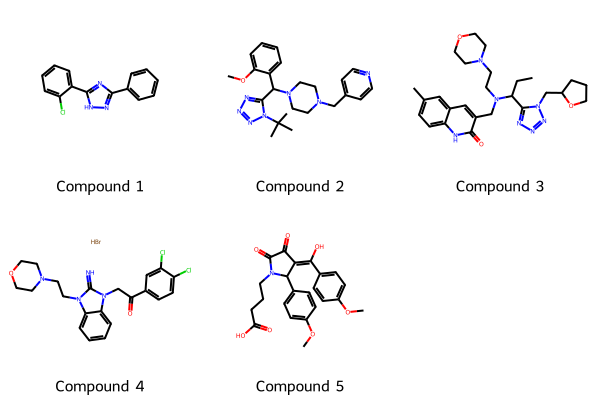

In [42]:
import numpy as np
import deepchem as dc
from tdc.single_pred import ADME

# Load the ADMET dataset
data = ADME(name='CYP2C9_Veith')
split = data.get_split()

# Inspecting the first few entries in the dataset
for i in range(5):
    compound = split['train']['Drug'][i]
    label = split['train']['Y'][i]
    print(f"Compound: {compound}, Inhibits CYP2C9: {'Yes' if label == 1 else 'No'}")
    molecules = [Chem.MolFromSmiles(compound) for compound in split['train']['Drug'][:5]]

# Visualize molecules
Draw.MolsToGridImage(molecules, legends=[f"Compound {i+1}" for i in range(5)])

In [40]:
import deepchem as dc
from tdc.single_pred import ADME

# Load the ADMET dataset
data = ADME(name='CYP2C9_Veith')
split = data.get_split()

# Dataset size
print("Training set size:", len(split['train']))
print("Validation set size:", len(split['valid']))
print("Test set size:", len(split['test']))

# Display first few compounds and labels
for i in range(5):
    compound = split['train']['Drug'][i]
    label = split['train']['Y'][i]
    print(f"Compound {i+1}: {compound}, Inhibits CYP2C9: {'Yes' if label == 1 else 'No'}")

# Label distribution
train_labels = split['train']['Y']
# Count inhibitors and non-inhibitors
num_inhibitors = np.sum(train_labels)
num_non_inhibitors = len(train_labels) - num_inhibitors

print("Number of inhibitors in training set:", num_inhibitors)
print("Number of non-inhibitors in training set:", num_non_inhibitors)

Found local copy...
Loading...
Done!


Training set size: 8465
Validation set size: 1209
Test set size: 2418
Compound 1: Clc1ccccc1-c1nc(-c2ccccc2)n[nH]1, Inhibits CYP2C9: Yes
Compound 2: COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1, Inhibits CYP2C9: Yes
Compound 3: CCC(c1nnnn1CC1CCCO1)N(CCN1CCOCC1)Cc1cc2cc(C)ccc2[nH]c1=O, Inhibits CYP2C9: No
Compound 4: Br.N=c1n(CCN2CCOCC2)c2ccccc2n1CC(=O)c1ccc(Cl)c(Cl)c1, Inhibits CYP2C9: Yes
Compound 5: COc1ccc(/C(O)=C2/C(=O)C(=O)N(CCCC(=O)O)C2c2ccc(OC)cc2)cc1, Inhibits CYP2C9: No
Number of inhibitors in training set: 2813
Number of non-inhibitors in training set: 5652


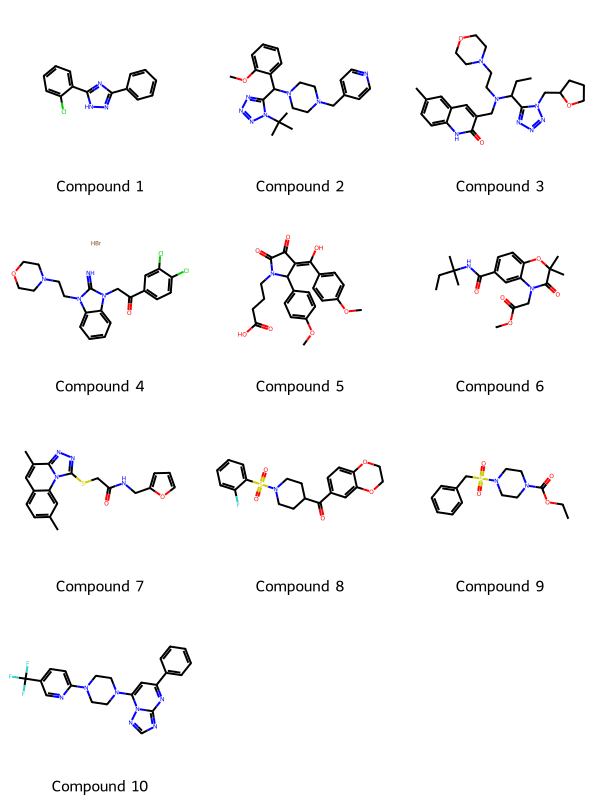

In [35]:
from rdkit import Chem
from rdkit.Chem import Draw

# Convert SMILES to RDKit molecule objects
molecules = [Chem.MolFromSmiles(compound) for compound in split['train']['Drug'][:10]]

# Visualize molecules
Draw.MolsToGridImage(molecules, legends=[f"Compound {i+1}" for i in range(10)])


In [36]:
from rdkit.Chem import Descriptors

# Example: Compute molecular weight for the first few compounds
for i, mol in enumerate(molecules):
    mol_weight = Descriptors.MolWt(mol)
    print(f"Compound {i+1} Molecular Weight: {mol_weight}")


Compound 1 Molecular Weight: 255.708
Compound 2 Molecular Weight: 421.54900000000026
Compound 3 Molecular Weight: 495.6280000000004
Compound 4 Molecular Weight: 514.2510000000002
Compound 5 Molecular Weight: 425.43700000000007
Compound 6 Molecular Weight: 362.42600000000016
Compound 7 Molecular Weight: 366.44600000000014
Compound 8 Molecular Weight: 405.4470000000001
Compound 9 Molecular Weight: 312.3910000000001
Compound 10 Molecular Weight: 425.4180000000001


In [44]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw

# Assuming you have a list of SMILES strings
smiles_list = ['Clc1ccccc1-c1nc(-c2ccccc2)n[nH]1', 'COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1']

# Convert SMILES to RDKit molecule objects
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

# Calculate molecular weights and draw molecules
for mol in molecules:
    mol_weight = Descriptors.MolWt(mol)
    print(f"Molecular Weight: {mol_weight}")
    img = Draw.MolToImage(mol)
    img.show()  # This will display the image in a window; for Jupyter, you'd use Draw.MolsToGridImage


Molecular Weight: 255.708
Molecular Weight: 421.54900000000026
